In [ ]:
# Image Filter

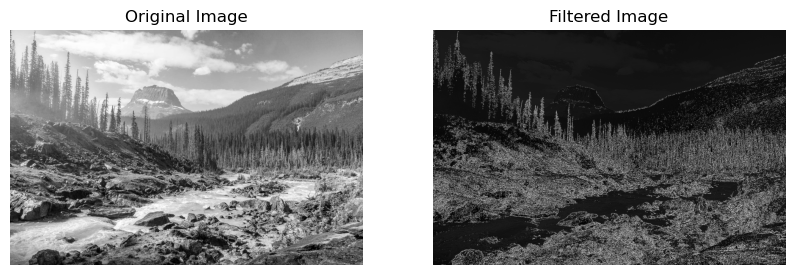

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Initialize an empty output image
    output_image = np.zeros_like(image)
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='edge')
    
    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            
            # Apply the kernel
            output_image[i, j] = np.sum(roi * kernel)
    
    return output_image

image = Image.open('Images/nature.png').convert('L')
image_array = np.array(image)

filter_kernel = np.array([[-1, -1, -1],
                          [-1, 9, -1],
                          [-1, -1, -1]])

# Perform convolution
filtered_image = convolve(image_array, filter_kernel)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()


In [14]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 

In [31]:
image = Image.open('Images/nature.png')
image_array = np.array(image)

gray_image = image.convert('L')
gray_image_array = np.array(gray_image)
L = np.max(gray_image)

In [ ]:
#negative of image

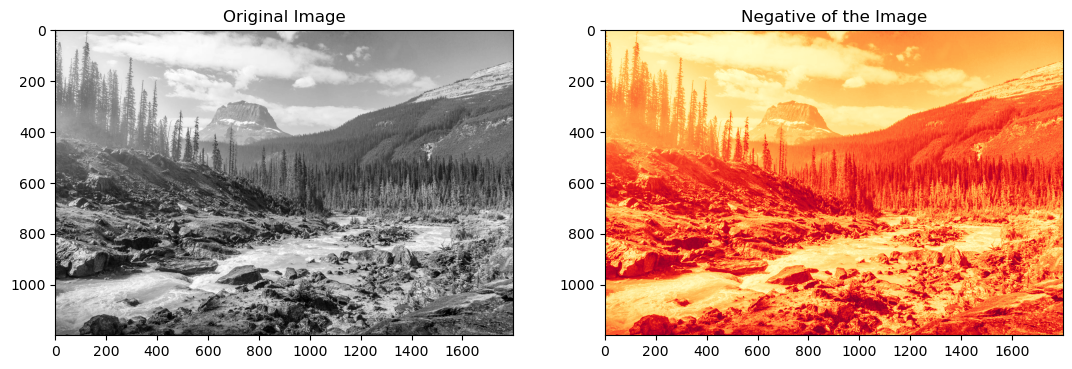

In [32]:
negativ_img = L - gray_image
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap="gray")
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(negativ_img, cmap='YlOrRd')
plt.title("Negative of the Image")
plt.show()

In [ ]:
#log Log Transformation

C:\Users\HIMEL\AppData\Local\Temp\ipykernel_29516\537787597.py:2: RuntimeWarning: divide by zero encountered in log
  log_trans_image = c * np.log(1 + image_array)
C:\Users\HIMEL\AppData\Local\Temp\ipykernel_29516\537787597.py:3: RuntimeWarning: invalid value encountered in cast
  log_trans_image = log_trans_image.astype(np.uint8)


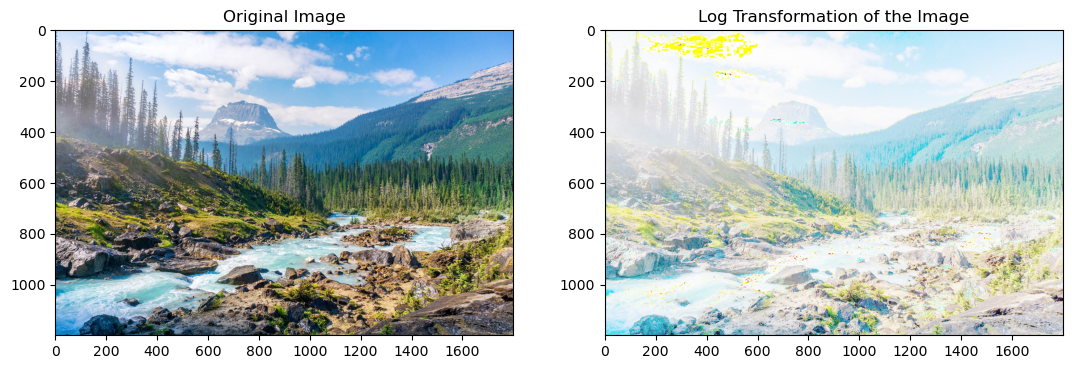

In [33]:
c = (L) / np.log(L + 1)
log_trans_image = c * np.log(1 + image_array)
log_trans_image = log_trans_image.astype(np.uint8)

plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(log_trans_image)
plt.title("Log Transformation of the Image")
plt.show()

In [ ]:
#Power LAW Transformation of the Image

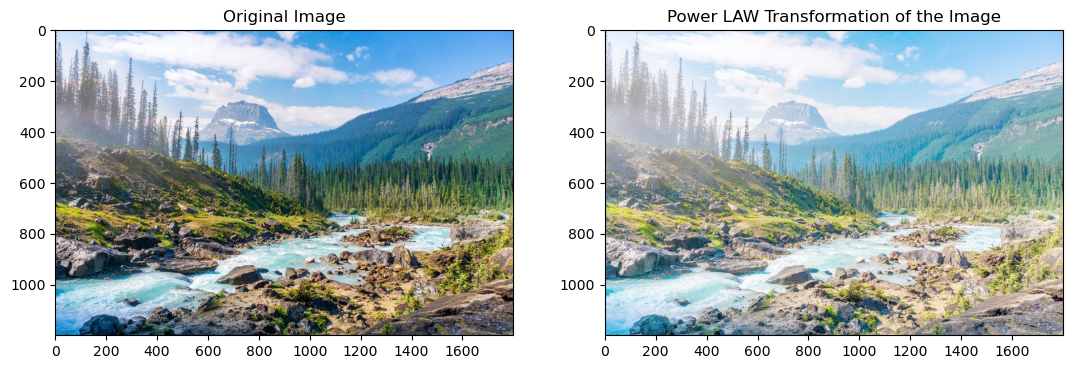

In [34]:
gamma = 0.5
s = L * ((image_array / L) ** gamma)

# s = np.clip(s, 0, L)
s = s.astype(np.uint8)

plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(s)
plt.title("Power LAW Transformation of the Image")
plt.show()